## Importing the libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset:

In [2]:
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns= boston.feature_names)

In [4]:
df['Price'] = pd.Series(boston.target)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# DESCRIPTIVE STATISTICS

**Finding Null Values and Handling missing Values**

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [7]:
df.shape

(506, 14)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


After performing **"describe()"** function, we get to know about the features:

1. **Mean**

2. **Median**

3. **Standard Deviation**

4. **Quantiles**

5. **Minimum and Maximum**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Visualizing the data ditribution to identify Outliers

**How to remove the outliers?**

There are several ways to remove outliers from a dataset. Here are some common methods:

**Z-score method:** This method involves calculating the Z-score of each data point and removing any points that are more than a certain number of standard deviations from the mean. Typically, any points with a Z-score greater than 3 or less than -3 are considered outliers and can be removed.

**IQR method:** This method involves calculating the interquartile range (IQR) of the dataset and removing any points that fall outside a certain range. Typically, any points below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers and can be removed.

**Visual inspection:** Sometimes, outliers can be identified by visually inspecting the data using box plots or scatter plots. Outliers can be identified as data points that are far from the other points in the dataset and can be removed manually.

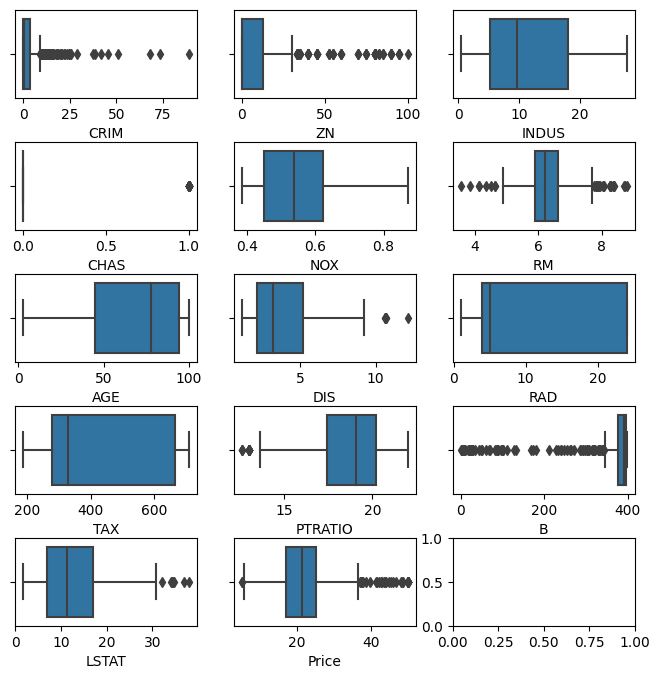

In [10]:
fig,axs = plt.subplots(ncols= 3, nrows= 5, figsize = (8,8))
plt.subplots_adjust(hspace=0.5)
for i, feature in enumerate(df.columns):
    row = i // 3
    col = i % 3
    ax = axs[row,col]
    sns.boxplot(x = df[feature], ax = ax)
plt.show()

### Calculating the upper bound and lower bound, visualizing IQR:

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:\n ", lower_bound)
print("Upper Bound:\n", upper_bound)

Lower Bound:
  CRIM        -5.310511
ZN         -18.750000
INDUS      -14.175000
CHAS         0.000000
NOX          0.186500
RM           4.778500
AGE        -28.550000
DIS         -2.532200
RAD        -26.000000
TAX       -301.500000
PTRATIO     13.200000
B          344.106250
LSTAT       -8.057500
Price        5.062500
dtype: float64
Upper Bound:
 CRIM          9.069639
ZN           31.250000
INDUS        37.465000
CHAS          0.000000
NOX           0.886500
RM            7.730500
AGE         167.650000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        31.962500
Price        36.962500
dtype: float64


### Calculating z-scores and deleting outliers

In [12]:
from scipy import stats
z_scores = np.abs(stats.zscore(df))

In [13]:
z_scores

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562,0.159686
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439,0.101524
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727,1.324247
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517,1.182758
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147,0.014454
502,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850,0.210362
503,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048,0.148802
504,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302,0.057989


In [14]:
df_cleaned = df[(z_scores < 3).all(axis = 1)]

In [15]:
df_cleaned.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2.452461,9.602410,10.829687,0.0,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976
std,4.897241,19.677404,6.798613,0.0,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366
min,0.006320,0.000000,0.460000,0.0,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000
25%,0.081005,0.000000,5.130000,0.0,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000
50%,0.211610,0.000000,8.560000,0.0,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000
75%,2.152115,12.500000,18.100000,0.0,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000
max,28.655800,80.000000,27.740000,0.0,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


### Correlation between the features:

**How to examine relationships between features?**

To examine relationships between features in the Boston dataset, there are several statistical techniques you can use. Here are a few commonly used methods:

**Correlation analysis:** Calculate the correlation coefficient between pairs of features in the dataset to determine the strength and direction of their linear relationship. This can be done using the corr method in Pandas or the pearsonr function in SciPy.

**Scatter plots:** Create scatter plots of pairs of features to visually examine their relationship. This can be done using the scatter method in Matplotlib or Seaborn.

**Linear regression:** Use linear regression to model the relationship between pairs of features. This can be done using the linregress function in SciPy or the LinearRegression class in scikit-learn.

**ANOVA:** Use analysis of variance (ANOVA) to test for significant differences in the means of groups defined by categorical variables. This can be done using the f_oneway function in SciPy.

**Chi-squared test:** Use the chi-squared test to test for independence between two categorical variables. This can be done using the chi2_contingency function in SciPy.

It's important to carefully choose the appropriate statistical technique based on the type of data you have and the research question you're trying to answer. Additionally, it's always a good idea to visualize the data in addition to using statistical techniques, as visualizations can often reveal patterns and relationships that are not immediately obvious in the raw data.

#### In this case, we will perform only Correlation analysis and Scatter Plots.

In [16]:
corr_matrix = df_cleaned.corr()

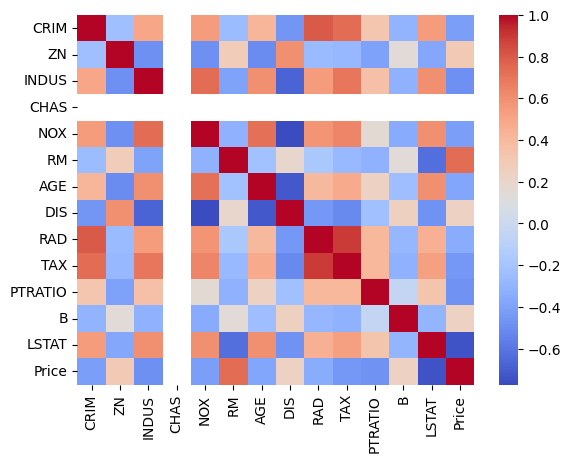

In [17]:
sns.heatmap(corr_matrix, cmap= 'coolwarm')
plt.show()

**In a heatmap, what should we focus?**

In a heatmap, you should focus on the color of each cell, which represents the strength and direction of the correlation between the corresponding pair of features. Positive correlations are typically shown in shades of red, while negative correlations are shown in shades of blue. Features with no correlation are typically shown in white.

Heatmaps are useful for identifying patterns of correlation between pairs of features in a dataset. By examining the colors in the heatmap, you can identify which pairs of features are strongly positively correlated, which are strongly negatively correlated, and which have little or no correlation. This information can be useful for feature selection, as well as for gaining insights into the relationships between different features in the dataset.

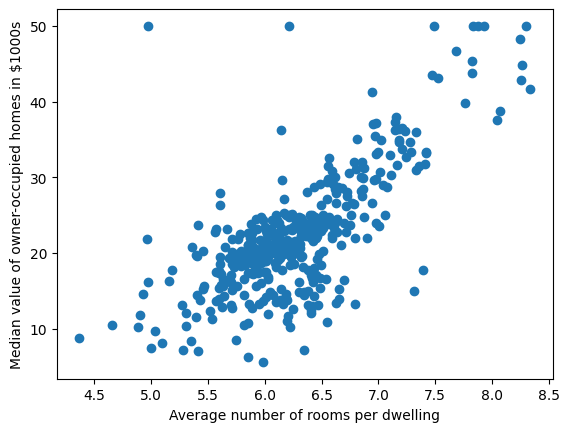

In [18]:
plt.scatter(df_cleaned['RM'], df_cleaned['Price'])
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

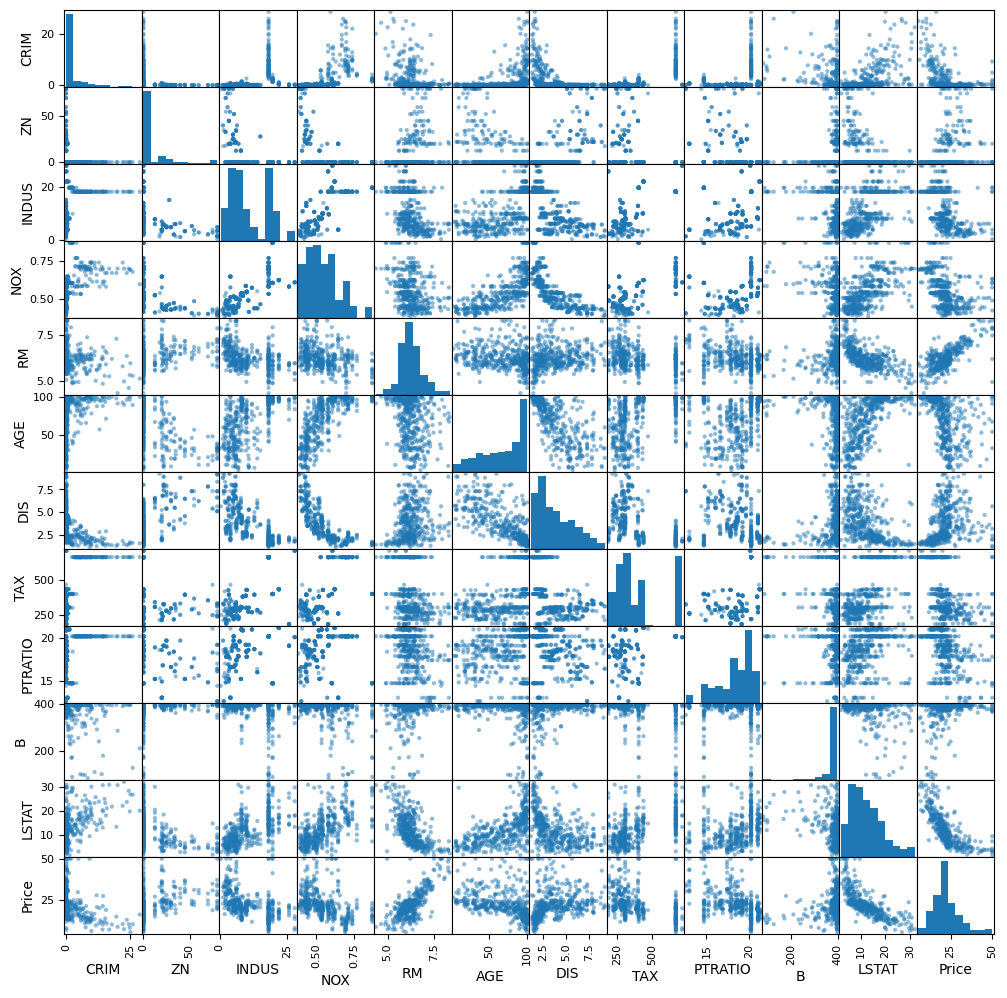

In [20]:
from pandas.plotting import scatter_matrix

features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
scatter_matrix(df_cleaned[features], figsize=(12, 12))
plt.show()

**How do we observe scatter plot? What does it tells?**

A scatter plot is a graph in which the values of two variables are plotted along two axes, with each data point represented by a dot. The position of each dot on the graph represents the values of the two variables for a single observation.

A scatter plot can be used to observe the relationship between two variables. By examining the plot, you can identify patterns in the data, such as whether there is a positive or negative correlation between the two variables, whether the relationship is linear or nonlinear, and whether there are any outliers or clusters of data points.

In a scatter plot, the x-axis represents the independent variable, while the y-axis represents the dependent variable. If there is a positive correlation between the two variables, then as the values of the independent variable increase, the values of the dependent variable also tend to increase. If there is a negative correlation, then as the values of the independent variable increase, the values of the dependent variable tend to decrease.

By examining the scatter plot, you can also identify any outliers or unusual data points that may need to be further investigated. For example, if there is a cluster of data points that are far away from the other data points in the plot, this may indicate the presence of an important subgroup in the data that should be explored in more detail.

# INFERENTIAL STATISTICS